In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np


import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import ExtraTreeRegressor

import warnings # To ignore the warnings
warnings.filterwarnings("ignore")

# ALGORITHMS WITH DEF 

In [2]:
def showRegressionTest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    lr = LinearRegression()
    regmodel = lr.fit(x_train, y_train)
    y_pretest = lr.predict(x_test)
    mse = (mean_squared_error(y_test,y_pretest)) ** 0.5
    r = r2_score(y_test, y_pretest)
    print("Count of Errors: ", mse)
    print("Success Rate: ", r)

In [3]:
def showRidgeTest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    R = Ridge()
    R.fit(x_train, y_train)
    y_pred_ridge = R.predict(x_test)
    mse = (mean_squared_error(y_test, y_pred_ridge)) ** 0.5
    r = r2_score(y_test, y_pred_ridge)
    print("Count of Errors: ", mse)
    print("Success Rate: ", r)

In [4]:
def showLassoTest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    L = Lasso()
    L.fit(x_train, y_train)
    y_pred_lasso = L.predict(x_test)
    mse = (mean_squared_error(y_test, y_pred_lasso)) ** 0.5
    r = r2_score(y_test, y_pred_lasso) 
    print("Count of Errors: ", mse)
    print("Success Rate: ", r)

In [5]:
def showElasticTest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    E = ElasticNet(l1_ratio = .8)
    E.fit(x_train,y_train) 
    y_pred_elastic = E.predict(x_test)
    mse = (mean_squared_error(y_test, y_pred_elastic)) ** 0.5
    r = r2_score(y_test, y_pred_elastic)
    print("Count of Errors: ", mse)
    print("Success Rate: ", r)

In [6]:
def showExtraTreeTest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    ETR = ExtraTreeRegressor()
    ETR.fit(x_train, y_train)
    y_pred_etr= ETR.predict(x_test)
    mse = (mean_squared_error(y_test, y_pred_etr)) ** 0.5
    r = r2_score(y_test, y_pred_etr)
    print("Count of Errors: ", mse)
    print("Success Rate: ", r)

In [7]:
df = pd.read_csv("kc_house_data.csv")

# EDA- Exploraty Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [11]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17110,1137400050,20140925T000000,425000.0,4,2.50,2480,4504,2.0,0,0,3,7,2480,0,2005,0,98059,47.4998,-122.150,2950,4504
4742,3330501545,20141201T000000,330000.0,2,1.00,950,3090,1.0,0,0,4,6,950,0,1909,0,98118,47.5510,-122.276,1230,4120
4246,6163900301,20150427T000000,425000.0,4,1.00,1480,8321,1.0,0,0,3,7,1080,400,1953,0,98155,47.7629,-122.318,1580,8502
4361,3876100940,20150427T000000,600000.0,4,1.75,3050,9440,1.0,0,0,3,8,1800,1250,1966,0,98034,47.7228,-122.183,2020,8660
17946,9485700150,20150304T000000,275000.0,2,1.00,920,7688,1.0,0,0,3,6,920,0,1955,0,98106,47.5281,-122.362,1040,7440
5934,4188000670,20140515T000000,749400.0,4,2.50,3240,20301,2.0,0,0,3,10,3240,0,1985,0,98052,47.7190,-122.114,3010,23650
19584,1025049266,20140930T000000,555000.0,2,2.25,1160,954,2.0,0,0,3,8,960,200,2014,0,98105,47.6647,-122.284,1160,1327
2598,7697870350,20140617T000000,259000.0,3,2.00,1870,5909,1.0,0,0,3,7,1270,600,1986,0,98030,47.3665,-122.183,1870,7887
21383,644000115,20140923T000000,1765000.0,4,3.25,3980,10249,2.0,0,0,3,10,3980,0,2011,0,98004,47.5873,-122.196,2450,10912
16337,6852700279,20140619T000000,475000.0,3,2.50,950,1110,2.0,0,0,3,8,950,0,2003,0,98102,47.6226,-122.319,1230,1215


In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
abs(df.corr()["price"]).sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

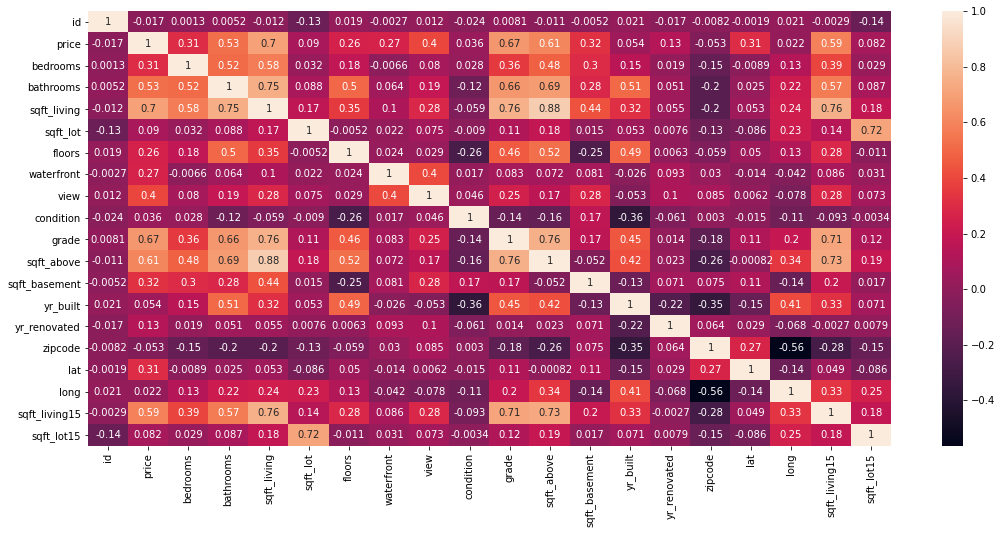

In [14]:
plt.figure(figsize = (18, 8))
sns.heatmap(df.corr(), annot = True);

### We only got corr between 20 and 90 percent . 
### Because under 20 is too low for correlation and over 90 is too much correlation

In [15]:
x = df[["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "sqft_basement", "bedrooms", "lat", "waterfront", "floors"]]

In [16]:
y = df["price"]

In [17]:
showRegressionTest(x, y)

Count of Errors:  226222.50493466956
Success Rate:  0.6614781405487571


# DATA PREPAIRING

### To prevent the zip code from gaining numerical advantage over each other. 
### We are gonna make zipcode's type category

In [18]:
df["zipcode"] = df["zipcode"].astype("category")

### If a house is built in 2020, that house is 1 year old. A house built in 2019 is 2 years old.
### so it is better to express it with age rather than years.

In [19]:
df["age"] = 2021 - df["yr_built"]

### We also added age and zipcode into x

In [20]:
x = df[["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "sqft_basement", "bedrooms", "lat", "waterfront", "floors", "age", "zipcode"]]

In [21]:
x = pd.get_dummies(x, drop_first = True)

In [22]:
x.sample(5)

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,age,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
10346,2490,8,2490,2030,2.25,0,0,4,47.7547,0,2.0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18874,1330,7,1330,1500,1.75,0,0,3,47.7199,0,1.0,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,2690,7,2690,2090,2.50,0,0,5,47.4914,0,2.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7724,2900,8,1890,2590,3.25,0,1010,5,47.6154,0,1.0,54,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3246,1940,7,1300,2000,1.50,0,640,3,47.4730,0,1.0,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
showRegressionTest(x, y)

Count of Errors:  171984.93902320272
Success Rate:  0.8043427535283417


### We are gonna examine outliers. If there is outlier. We are gonna seperate them

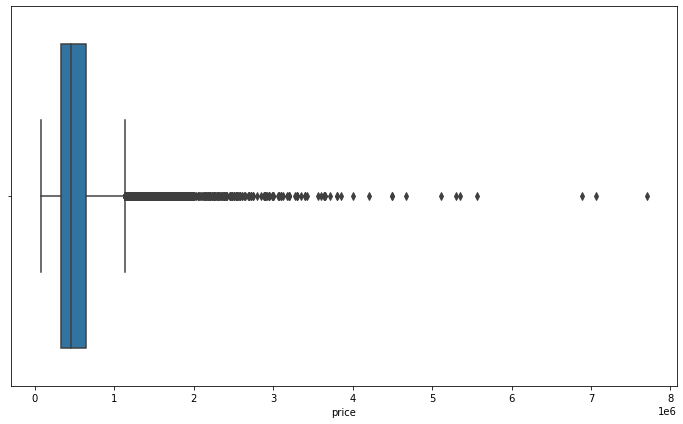

In [24]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["price"])
plt.tight_layout()

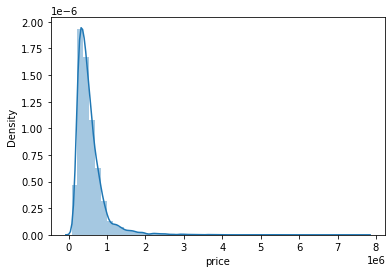

In [25]:
sns.distplot(df["price"]);

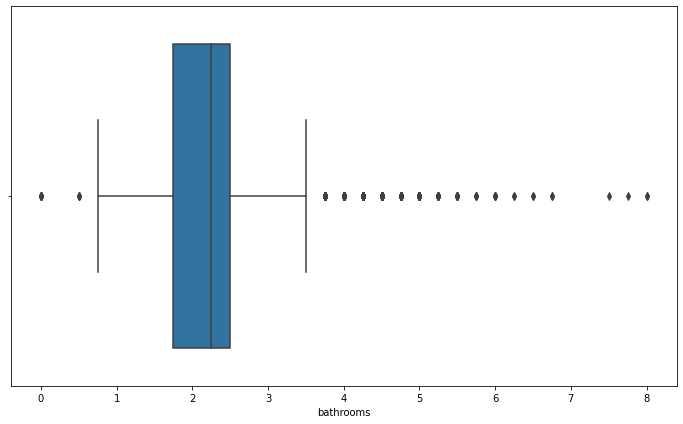

In [26]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["bathrooms"])
plt.tight_layout()

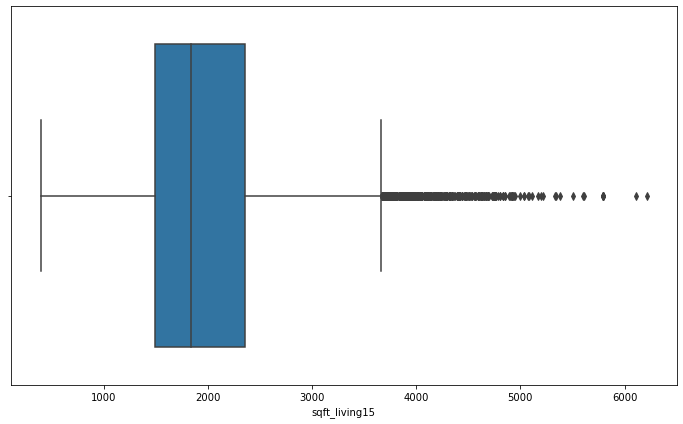

In [27]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["sqft_living15"])
plt.tight_layout()

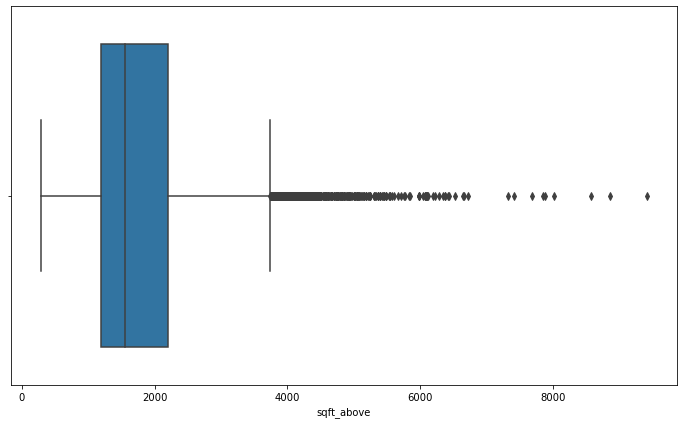

In [28]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["sqft_above"])
plt.tight_layout()

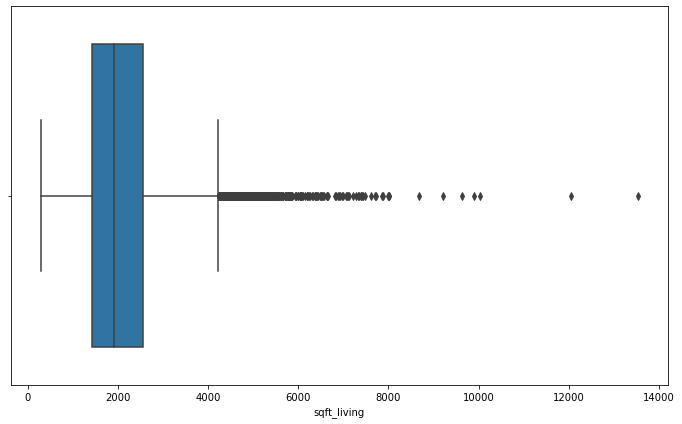

In [29]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["sqft_living"])
plt.tight_layout()

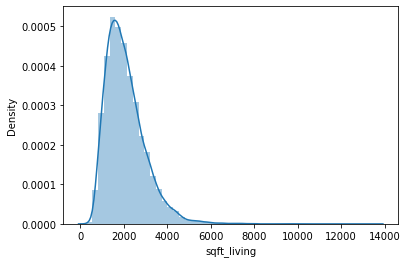

In [30]:
sns.distplot(df["sqft_living"]);

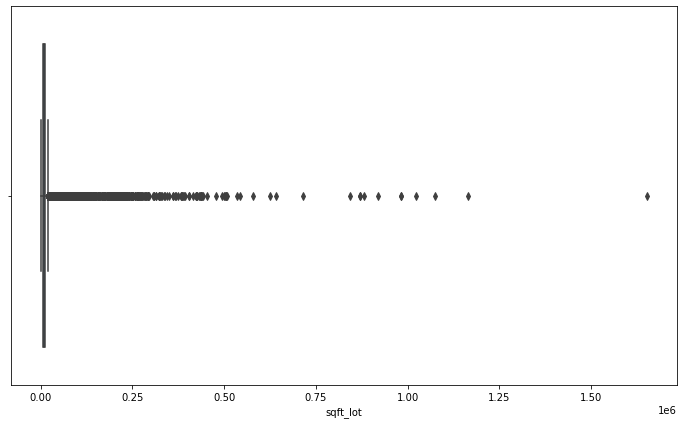

In [31]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["sqft_lot"])
plt.tight_layout()

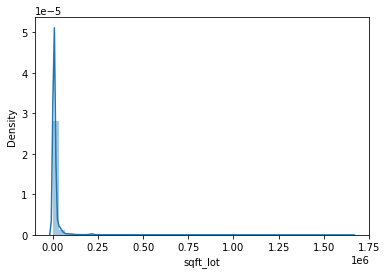

In [32]:
sns.distplot(df["sqft_lot"]);

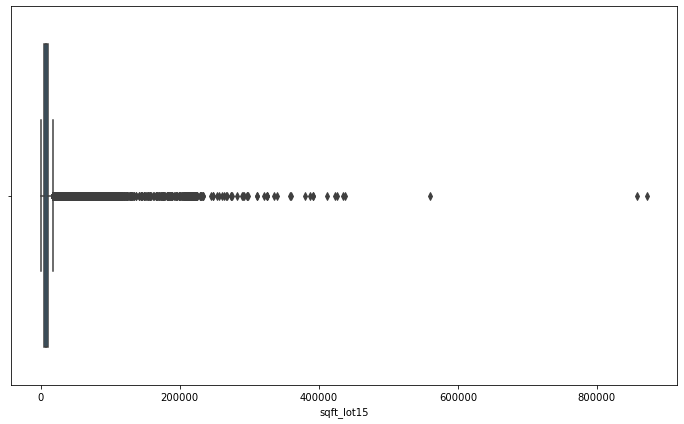

In [33]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["sqft_lot15"])
plt.tight_layout()

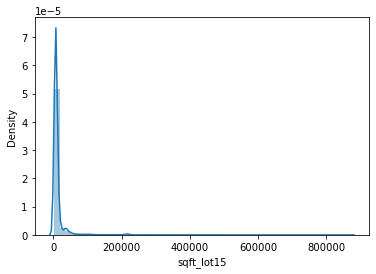

In [34]:
sns.distplot(df["sqft_lot15"]);

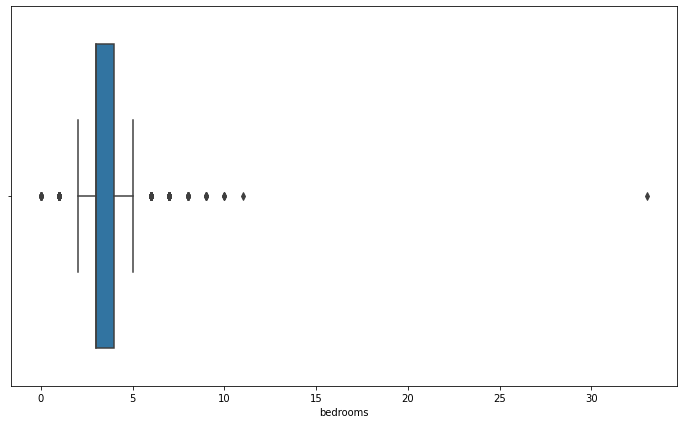

In [35]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["bedrooms"])
plt.tight_layout()

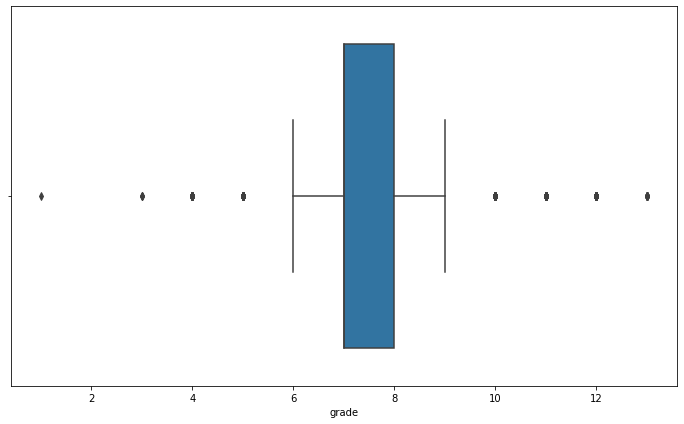

In [36]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["grade"])
plt.tight_layout()

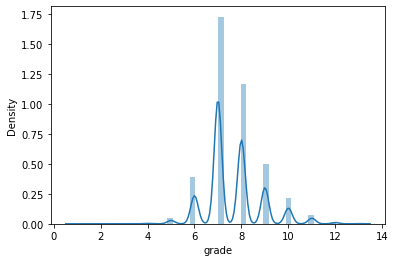

In [37]:
sns.distplot(df["grade"]);

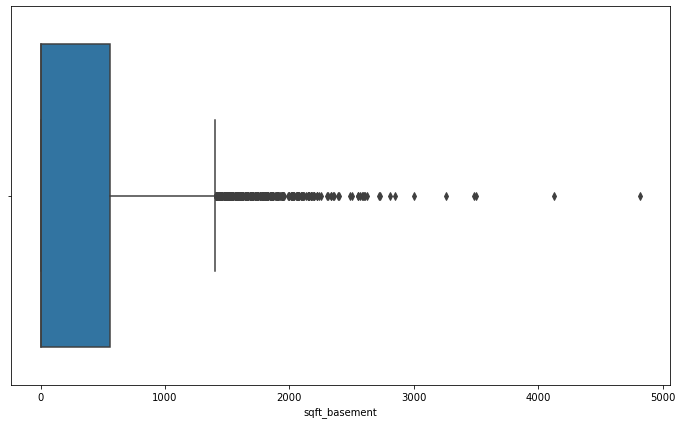

In [38]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["sqft_basement"])
plt.tight_layout()

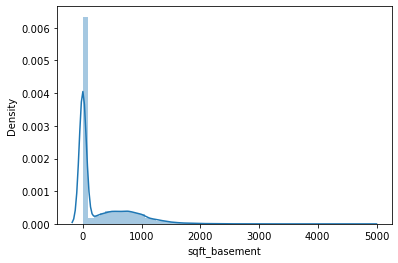

In [39]:
sns.distplot(df["sqft_basement"]);

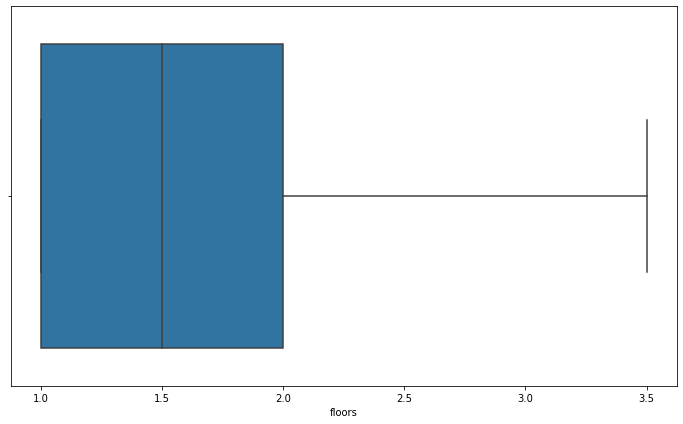

In [40]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["floors"])
plt.tight_layout()

### Here, We are seperate outliers

In [41]:
df = df[df["bathrooms"] < 7]

In [42]:
df = df[df["bedrooms"] < 10]

In [43]:
df = df[df["sqft_lot"] < 12500]

In [44]:
df = df[df["sqft_lot15"] < 250000]

In [45]:
df = df[df["sqft_living"] < 8000]

In [46]:
df = df[df["grade"] > 2]

In [47]:
df = df[df["floors"] < 3]

In [48]:
df = df[df["price"] < 770000]

In [49]:
x = df[["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "bedrooms", "lat", "waterfront", "floors", "age", "zipcode", "sqft_lot", "sqft_lot15"]]
y = df[["price"]]
x = pd.get_dummies(x, drop_first = True)

In [50]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
count,1.474100e+04,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000,14741.000000
mean,4.788170e+09,418017.045994,3.252154,1.944271,1796.411709,6732.477919,1.404993,0.000814,0.105081,3.409809,7.297605,1552.363408,244.048301,1968.826810,59.657825,47.551473,-122.228228,1784.337291,6872.737670,52.173190
std,2.864108e+09,153969.714857,0.869416,0.675160,638.741818,2638.759023,0.470658,0.028521,0.482968,0.649253,0.859752,609.838734,371.323221,29.674527,339.741411,0.142076,0.132786,509.277478,3442.369955,29.674527
min,1.000102e+06,80000.000000,0.000000,0.000000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,47.189500,-122.512000,460.000000,651.000000,6.000000
25%,2.391600e+09,295000.000000,3.000000,1.500000,1320.000000,4850.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1100.000000,0.000000,1949.000000,0.000000,47.451300,-122.335000,1410.000000,5000.000000,27.000000
50%,4.083802e+09,399950.000000,3.000000,2.000000,1720.000000,6985.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1400.000000,0.000000,1969.000000,0.000000,47.555700,-122.268000,1700.000000,7125.000000,52.000000
75%,7.519001e+09,530000.000000,4.000000,2.500000,2200.000000,8582.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1870.000000,480.000000,1994.000000,0.000000,47.680300,-122.153000,2090.000000,8480.000000,72.000000
max,9.900000e+09,769995.000000,9.000000,5.750000,5110.000000,12498.000000,2.500000,1.000000,4.000000,5.000000,11.000000,4500.000000,2170.000000,2015.000000,2015.000000,47.777600,-121.315000,4410.000000,196591.000000,121.000000


In [51]:
x.sample(5)

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,lat,waterfront,floors,age,sqft_lot,sqft_lot15,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6238,2130,7,2130,1500,2.50,0,5,47.4726,0,2.0,8,8428,11810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14535,2560,7,1890,1330,2.00,0,4,47.6914,0,1.0,74,7798,7798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11519,1230,7,1230,2220,1.00,0,3,47.5822,0,1.0,70,8114,8114,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7230,1990,7,1990,1990,2.50,0,5,47.7162,0,2.0,47,6840,7150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21564,3080,9,3080,3000,2.75,0,5,47.4922,0,2.0,7,5752,4650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
showRegressionTest(x, y)

Count of Errors:  68646.55478334214
Success Rate:  0.8037256808272534


### We will increase the effect of some features to increase the success rate.

In [53]:
x["bedrooms"] = df["bedrooms"] ** 3

In [54]:
showRegressionTest(x, y)

Count of Errors:  68453.44027176319
Success Rate:  0.8048284340534875


### sqft_basement and yr_renovated should be 1 or 0 because there is no superiority like that.

In [55]:
x["sqft_basement"] = np.where(df["sqft_basement"] > 0, 1, 0)
x["yr_renovated"] = np.where(df["yr_renovated"] > 0, 1, 0)

In [56]:
showRegressionTest(x, y)

Count of Errors:  68479.82894270035
Success Rate:  0.8046779285148751


### LET'S COMPARE DIFFERENT ALGORITHMS

In [57]:
showRegressionTest(x, y)

Count of Errors:  68479.82894270035
Success Rate:  0.8046779285148751


In [58]:
showRidgeTest(x, y)

Count of Errors:  68677.04700373358
Success Rate:  0.8035512753083178


In [59]:
showLassoTest(x, y)

Count of Errors:  68490.70742373455
Success Rate:  0.8046158671384671


In [60]:
showElasticTest(x, y)

Count of Errors:  105859.98148953565
Success Rate:  0.5332443160578453


In [61]:
showExtraTreeTest(x, y)

Count of Errors:  89916.93176735441
Success Rate:  0.6632489597329495


# REGRESSION IS BETTER FOR THIS PROJECT